In [3]:
from PIL import Image

In [4]:
from sympy import *

In [5]:
from numpy import array

In [6]:
import numpy as np

In [7]:
from math import floor

In [8]:
imagen = Image.open('salamanquesa.jpeg')

In [9]:
def mini(imag):
    imagaux=imag
    miniatura = (120, 120)
    imagaux.thumbnail(miniatura)
    return(imagaux)

In [10]:
au=mini(imagen)

In [9]:
au.show()

In [10]:
def SimHo(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[imag.size[0]+i,j]=mpaux[imag.size[0]-i-1,j]
    return(imagaux)

In [11]:
au2=SimHo(au)

In [12]:
au2.show()

In [13]:
def SimVe(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]*2),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,imag.size[1]+j]=mpaux[i,imag.size[1]-j-1]
    return(imagaux)

In [14]:
au3=SimVe(au)

In [15]:
au3.show()

In [16]:
def pmm(imag,rang):
    a3=imag
    for i in range(rang):
        a1=SimHo(a3)
        a2=SimVe(a1)
        a3=a2

        i=i+1
    return(a3)

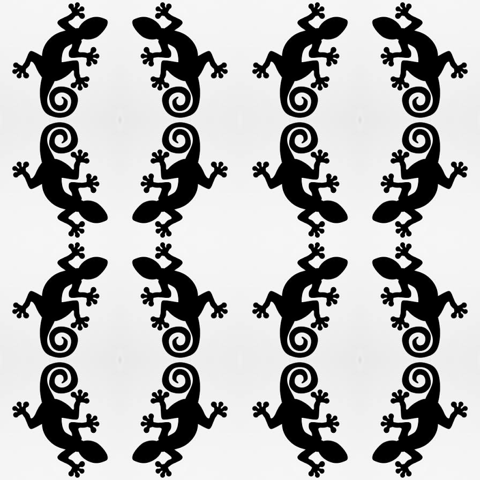

In [17]:
pmm(au,2)

In [18]:
def Matrotacion(angulo):
    M=array([[cos(angulo),-sin(angulo)],[sin(angulo),cos(angulo)]])
    return(M)

In [19]:
Matrotacion(pi/4).tolist()

[[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]]

In [20]:
M=Matrotacion(pi/4)

In [21]:
list(M.dot([1,1]))

[0, sqrt(2)]

In [ ]:
def Rotacion(imag,angulo):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    M=Matrotacion(angulo)
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i+imag.size[0],j]=mpaux[floor(np.dot(M,[i,j]).tolist()[0])+imag.size[0],floor(np.dot(M,[i,j]).tolist()[1])+imag.size[1]]
    return(imagaux)

In [26]:
def Rotacion2(imag,angulo):
    mp=imag.load()
    xmax=imag.size[0]
    ymax=imag.size[1]
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    M=Matrotacion(angulo)
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            ncoord = [i-xmax/2,j-ymax/2]
            ncoord = [int(x) for x in list(M.dot(ncoord))]
            ncoord = [int(ncoord[0]+xmax/2), int(ncoord[1]+ymax/2)]
            mpaux[(ncoord[0]+xmax)%(2*xmax),ncoord[1]%(2*ymax)]=mp[i,j]
    return(imagaux)

In [27]:
aa=Rotacion2(au,pi/4)

In [28]:
aa.show()

In [18]:
rot=au.rotate(45, expand=1)

In [19]:
rot.show()

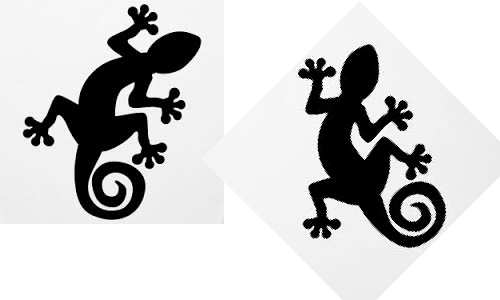

In [41]:
src_im = Image.open("salamanquesa.jpeg")
angle = 45
size = 100, 100

dst_im = Image.new("RGBA", (500,300), "white" )
im = src_im.convert('RGBA')
rot = im.rotate( angle, expand=1)
dst_im.paste(src_im, (0,0))
dst_im.paste( rot, (200,0), rot )

dst_im
#dst_im.save("rotada.png")

In [39]:
LL=array([[cos(pi),-sin(pi)],[sin(pi),cos(pi)]])

In [ ]:
LL

In [ ]:
V=([2,2])

In [ ]:
np.dot(LL,V).tolist()

In [ ]:
pi/2

In [ ]:
cos(pi)